<a href="https://colab.research.google.com/github/mihir0804/Predictive_Supply_Chain_Analytics/blob/main/Predictive_Supply_Chain_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive_Supply_Chain_Analytics**


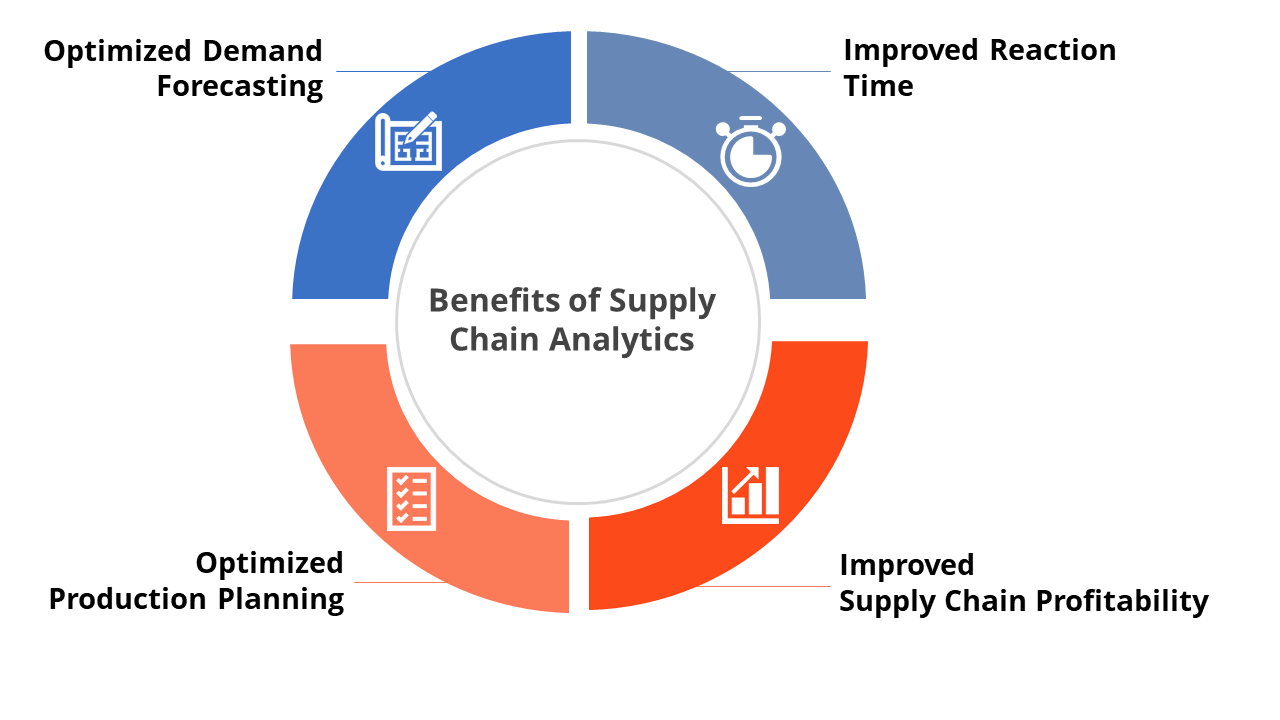

## **Machine Learning Model:**
Warehouse Load Forecasting Model

## **Problem Definition**

# Define Problem Statement:

Predict the total product weight (product_wg_ton) stored in a warehouse based on operational, environmental, and infrastructure-related factors.




# End User Objective:

- Enable supply chain and warehouse managers to:

- Forecast warehouse load more accurately.

- Enhance inventory planning.

- Improve space utilization.

- Boost logistics efficiency.



# Outcome:

A regression model that:

- Estimates product_wg_ton per warehouse.

- Aids in proactive decision-making for warehouse operations.


## **Import Neccessory Library**

In [1]:
# Importing Data visualization Library
import pandas as pd
import numpy as np

# Importing Data Manipulation Library
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

# Importing Logging
import logging
logging.basicConfig(level= logging.INFO,
                    filename  = 'model.log',
                    format=('%(asctime)s - %(levelname)s - %(message)s'),
                    filemode= 'w',
                    force= True)

# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

## **Import Dataset using Pandas Function**

In [2]:
df = pd.read_csv('/content/SCM 01.csv')
df.sample(frac = 1)


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
16641,WH_116641,EID_66641,Rural,Small,North,Zone 6,8,0,3,4285,...,1,225,36.0,1999.0,25,1,A+,4,9,32078
11049,WH_111049,EID_61049,Rural,Mid,West,Zone 3,0,4,4,4358,...,1,257,56.0,NaN,4,0,B+,1,19,4074
13712,WH_113712,EID_63712,Rural,Mid,North,Zone 4,2,0,3,4988,...,0,207,23.0,NaN,21,0,A,3,26,28110
9267,WH_109267,EID_59267,Rural,Large,West,Zone 6,7,2,4,5913,...,1,67,NaN,NaN,5,0,B,1,23,6130
3718,WH_103718,EID_53718,Rural,Large,North,Zone 6,3,0,3,3878,...,0,152,41.0,2013.0,18,0,C,6,28,22137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21663,WH_121663,EID_71663,Rural,Small,South,Zone 1,1,0,2,3798,...,1,155,38.0,NaN,33,0,A+,5,21,45087
7386,WH_107386,EID_57386,Rural,Large,West,Zone 6,4,4,2,5013,...,1,101,39.0,NaN,8,0,A,1,6,11096
16861,WH_116861,EID_66861,Rural,Large,West,Zone 5,2,3,4,4426,...,1,91,29.0,NaN,22,0,B+,2,25,25088
6050,WH_106050,EID_56050,Rural,Small,North,Zone 1,3,0,3,4500,...,0,115,19.0,2004.0,32,0,C,3,31,42124


## **Checking Information about Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

## **Checking Null Values Information**

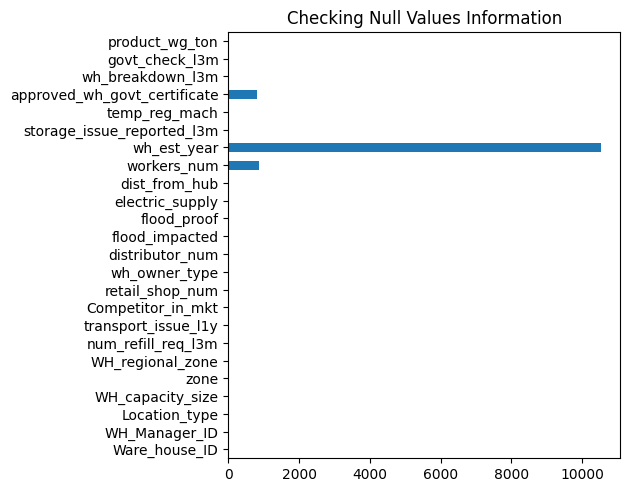

In [4]:
df.isnull().sum().plot(kind = 'barh')
plt.tight_layout()
plt.title('Checking Null Values Information')
plt.show()

In [5]:
Null_values = df.isnull().sum()/len(df)*100
Null_values[Null_values > 0].sort_values(ascending= False)

,0
wh_est_year,47.607223
workers_num,3.959368
approved_wh_govt_certificate,3.634312


In [6]:
# Dropping Unique and having more than 20% Missing values Columns
df.drop(columns= ['Ware_house_ID','WH_Manager_ID','wh_est_year'], axis = 1, inplace= True)

## **Segregate Numerical columns and Categorical columns**

In [7]:
numerical_col = df.select_dtypes(exclude= 'object')

categorical_col = df.select_dtypes(include= 'object')

## **EDA : Checking Univariate Analysis**

In [8]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis
0,num_refill_req_l3m,0.0,8.0,4.097020,5.0,2.00,6.0,4.00,2.606289,-0.081390,-1.218193
1,transport_issue_l1y,0.0,5.0,0.777201,0.0,0.00,1.0,1.00,1.201747,1.605424,1.820683
2,Competitor_in_mkt,0.0,12.0,3.103928,2.0,2.00,4.0,2.00,1.142886,0.985102,1.798511
3,retail_shop_num,1821.0,11008.0,4983.115711,4808.0,4309.25,5499.0,1189.75,1050.634225,0.905324,1.846915
4,distributor_num,15.0,70.0,42.386998,21.0,29.00,56.0,27.00,16.057730,0.017210,-1.187118
5,flood_impacted,0.0,1.0,0.098691,0.0,0.00,0.0,0.00,0.298253,2.691308,5.243614
6,flood_proof,0.0,1.0,0.054492,0.0,0.00,0.0,0.00,0.226991,3.925685,13.412215
7,electric_supply,0.0,1.0,0.656072,1.0,0.00,1.0,1.00,0.475028,-0.657167,-1.568273
8,dist_from_hub,55.0,271.0,163.613725,204.0,109.00,218.0,109.00,62.660709,-0.009042,-1.200679
9,workers_num,10.0,98.0,28.936398,28.0,24.00,33.0,9.00,7.843431,1.042478,3.285720


## **EDA: BI Variate Analysis**

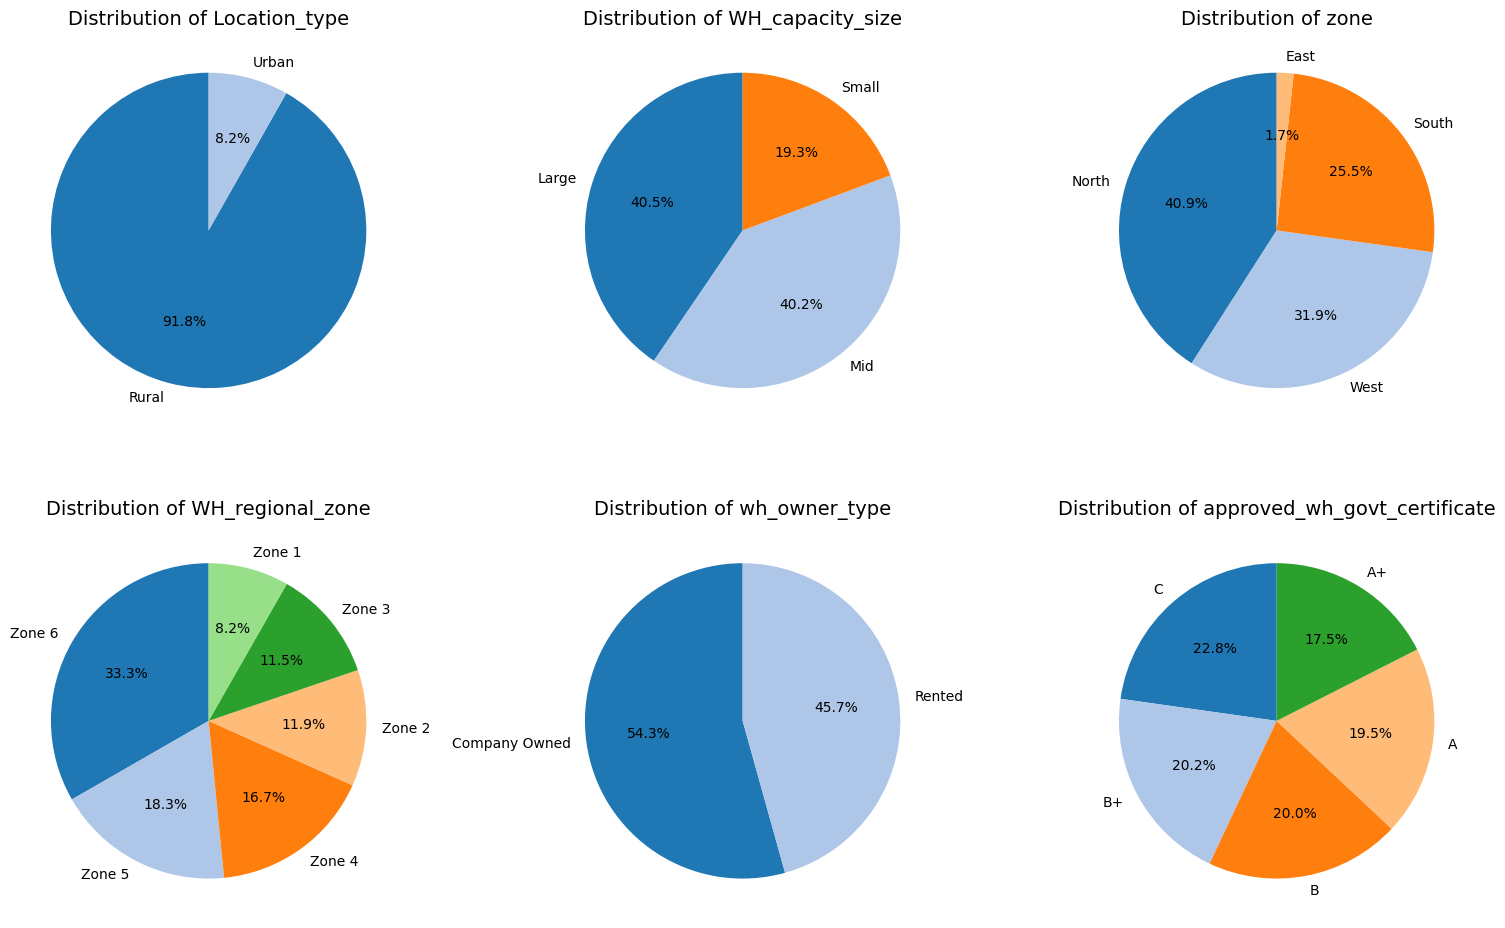

In [9]:
import matplotlib.pyplot as plt

# List of categorical columns
cat_feature = df[['Location_type','WH_capacity_size','zone','WH_regional_zone',
                  'wh_owner_type','approved_wh_govt_certificate']]

# Subplot grid configuration
n_cols = 3
n_rows = -(-len(cat_feature.columns) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array
axes = axes.flatten()

# Loop over columns and create pie charts
for idx, col in enumerate(cat_feature.columns):
    counts = cat_feature[col].value_counts()
    axes[idx].pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    axes[idx].set_title(f'Distribution of {col}', fontsize=14)

# Remove empty axes if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Data Insights

1. **Location Type**
   - A significant majority (**91.8%**) of warehouses are located in **rural areas**, while only **8.2%** are situated in **urban areas**.

2. **Warehouse Capacity Size**
   - Warehouses are categorized by capacity as follows:
     - **Large**: 40.5%
     - **Mid-sized**: 40.2%
     - **Small**: 19.3%
   - This reflects a nearly even distribution between large and mid-sized facilities, with fewer small warehouses.

3. **Zone Distribution**
   - Warehouse presence by zone is:
     - **North**: 40.9% (highest)
     - **West**: 31.9%
     - **South**: 25.5%
     - **East**: 7% (lowest)
   - The North zone dominates the distribution, while the East is underrepresented.

4. **Regional Zone (WH_regional_zone)**
   - Distribution across regional zones:
     - **Zone 6**: 33.3% (highest)
     - **Zone 5**: 18.3%
     - **Zone 4**: 16.7%
     - **Zone 3**: 11.5%
     - **Zone 2**: 11.9%
     - **Zone 1**: 8.2% (lowest)

5. **Warehouse Ownership**
   - **54.3%** of the warehouses are **company-owned**, while **45.7%** are **rented**.
   - This suggests a moderately balanced ownership structure.

6. **Government Certification**
   - Warehouse government approval categories are fairly balanced:
     - **A+**: 17.5%
     - **A**: 19.5%
     - **B+**: 20.2%
     - **B**: 20%
     - **C**: 20.2%
   - Indicates a broad distribution across compliance levels with no extreme skew.



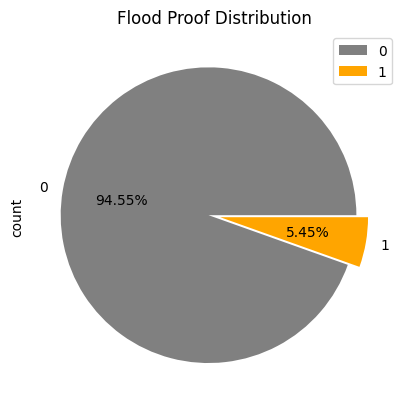

In [10]:
# Flood proof warehouses Distribution
import matplotlib.pyplot as plt

colors = ['gray', 'orange']
df['flood_proof'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',   # Added %% to actually show % sign
    colors=colors,
    explode=[0.04, 0.04],
    legend=True          # Optional legend
)
plt.title('Flood Proof Distribution')
plt.show()


# Data Insights
### Flood-Proof Warehouse Distribution Insight
- 94.55% of warehouses are not flood-proof, highlighting a potential risk during flood events.

- Only 5.45% of warehouses are flood-proof, indicating limited infrastructure readiness against flooding.

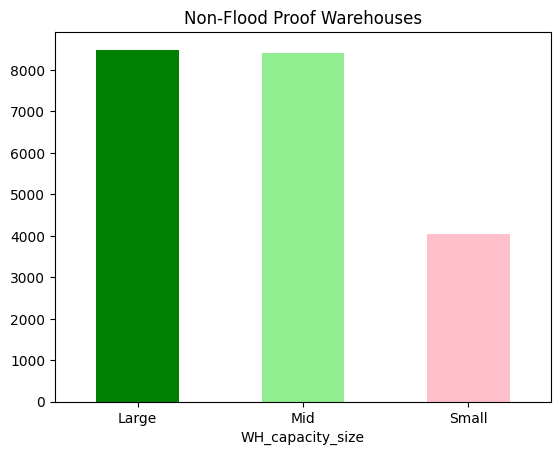

In [11]:
# Non-flood-proof warehouses
colors = ['green','lightgreen','pink']
df[df['flood_proof'] == 0]['WH_capacity_size'].value_counts().plot(kind = 'bar', color= colors)
plt.title('Non-Flood Proof Warehouses')
plt.xticks(rotation=0);

# Data Insights
### Non-Flood-Proof Warehouses by Capacity Size
- Large and Mid-size warehouses account for the majority of non-flood-proof facilities.

- Small-size warehouses have relatively better flood protection in comparison.

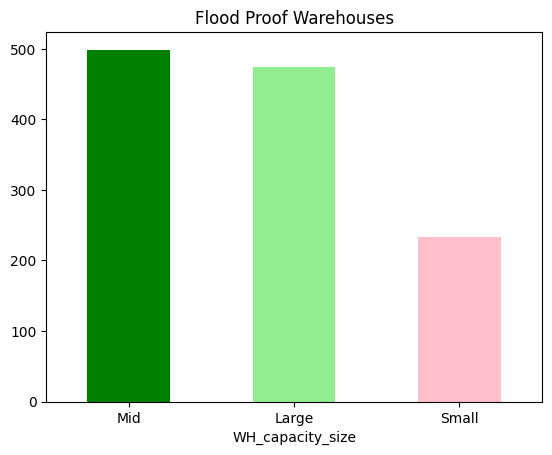

In [12]:
# Flood-proof warehouses
colors = ['green','lightgreen','pink']
df[df['flood_proof'] == 1]['WH_capacity_size'].value_counts().plot(kind = 'bar', color= colors);
plt.title('Flood Proof Warehouses')
plt.xticks(rotation=0);

# Data Insights
### Flood-Proof Warehouses by Capacity Size
- Among the flood-proof warehouses, the Mid-size category has the highest count, followed by Large and then Small capacity warehouses.

- *This* indicates that Mid-size warehouses are relatively better equipped for flood protection compared to others.

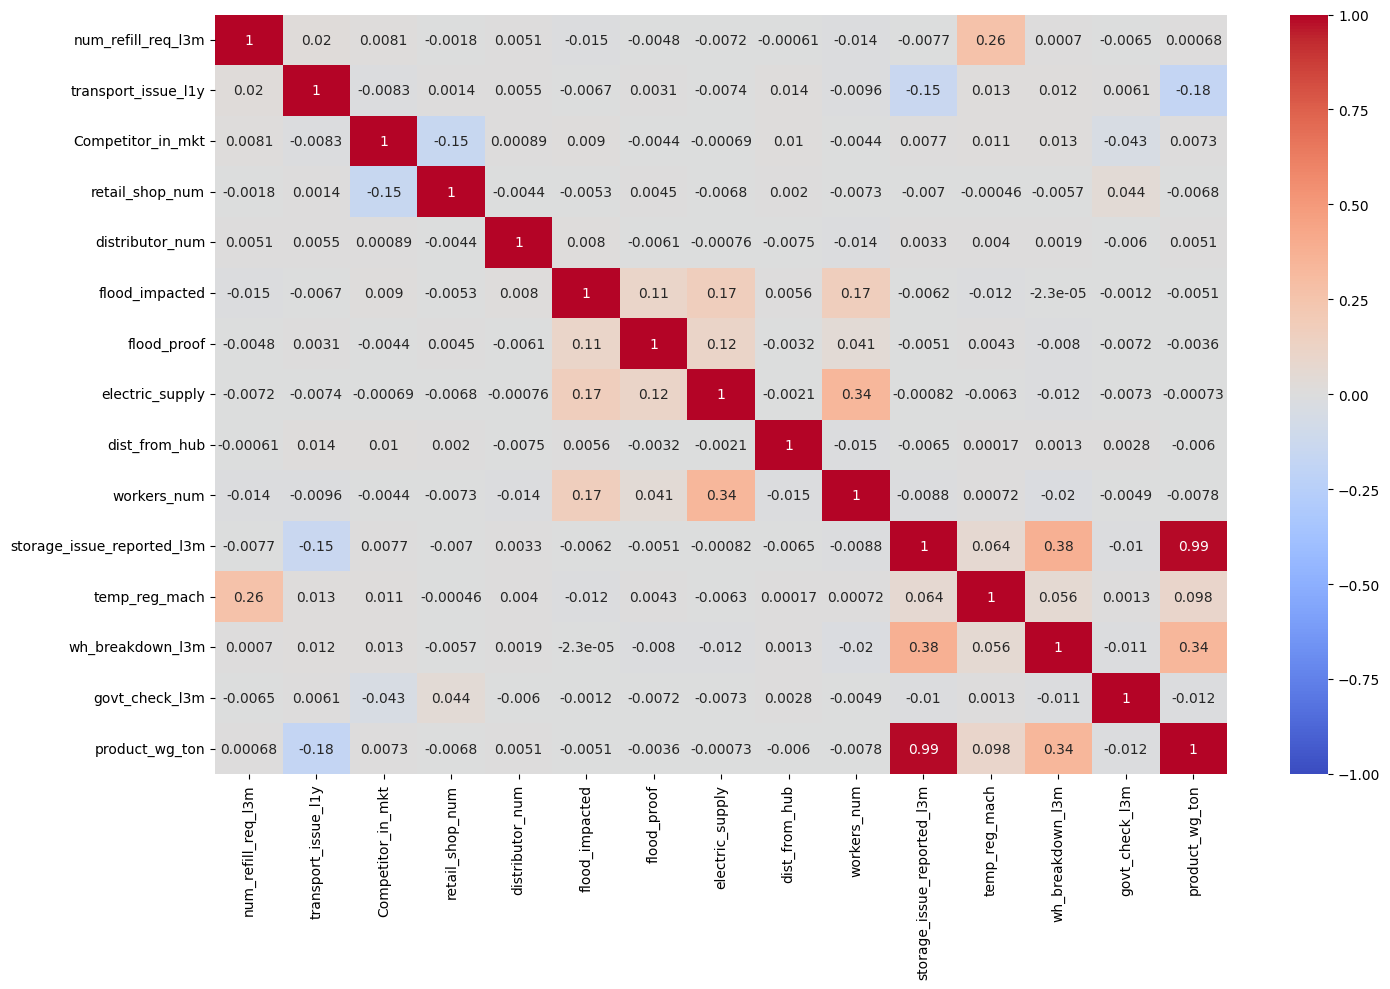

In [13]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlations safely
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()


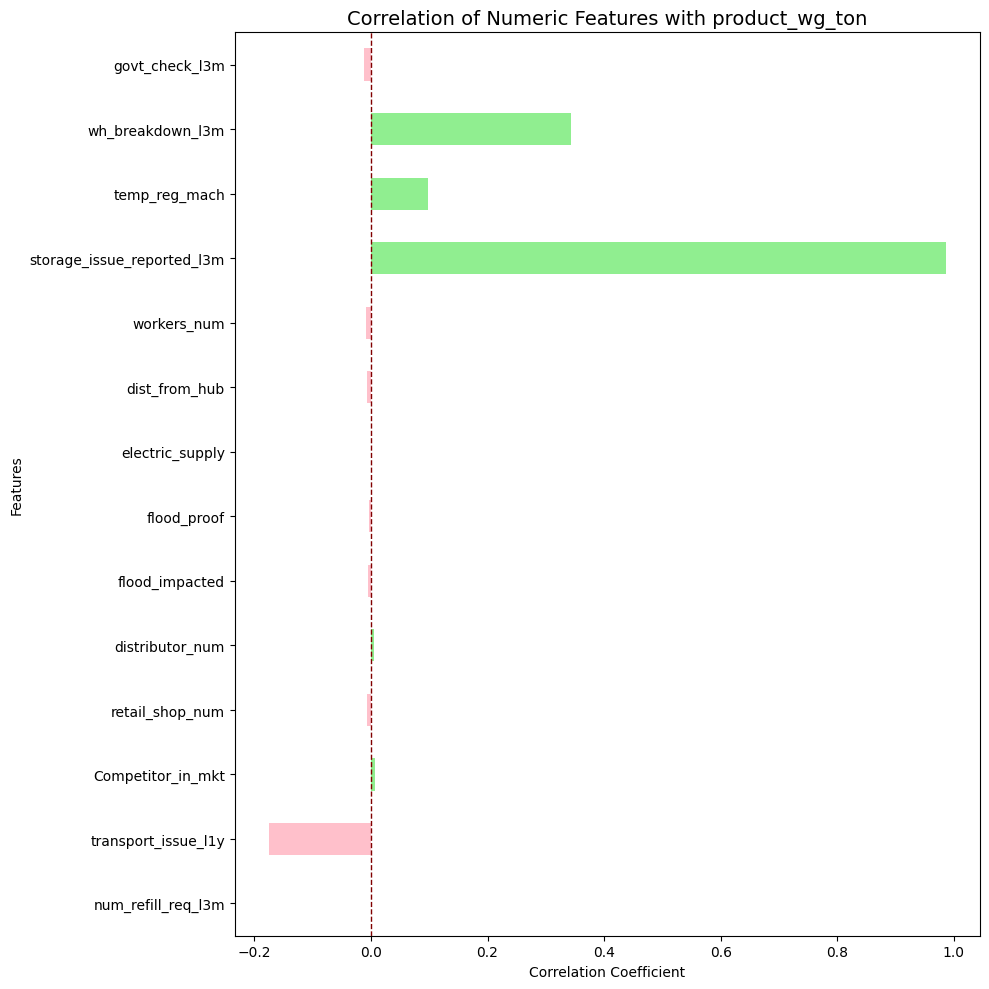

In [14]:

# Compute correlation with target
correlation_series = numeric_df.corr()['product_wg_ton'].drop('product_wg_ton')  # Drop self-correlation

# Plot
colors = ['pink' if val < 0 else 'lightgreen' for val in correlation_series]
plt.figure(figsize=(10, 10))
correlation_series.plot(kind='barh', color=colors)
plt.axvline(0, color='maroon', linestyle='--', linewidth=1)
plt.title('Correlation of Numeric Features with product_wg_ton', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



# Data Insights

1. **Location Type**
   - A significant majority (**91.8%**) of warehouses are located in **rural areas**, while only **8.2%** are situated in **urban areas**.

2. **Warehouse Capacity Size**
   - Warehouses are categorized by capacity as follows:
     - **Large**: 40.5%
     - **Mid-sized**: 40.2%
     - **Small**: 19.3%
   - This reflects a nearly even distribution between large and mid-sized facilities, with fewer small warehouses.

3. **Zone Distribution**
   - Warehouse presence by zone is:
     - **North**: 40.9% (highest)
     - **West**: 31.9%
     - **South**: 25.5%
     - **East**: 7% (lowest)
   - The North zone dominates the distribution, while the East is underrepresented.

4. **Regional Zone (WH_regional_zone)**
   - Distribution across regional zones:
     - **Zone 6**: 33.3% (highest)
     - **Zone 5**: 18.3%
     - **Zone 4**: 16.7%
     - **Zone 3**: 11.5%
     - **Zone 2**: 11.9%
     - **Zone 1**: 8.2% (lowest)

5. **Warehouse Ownership**
   - **54.3%** of the warehouses are **company-owned**, while **45.7%** are **rented**.
   - This suggests a moderately balanced ownership structure.

6. **Government Certification**
   - Warehouse government approval categories are fairly balanced:
     - **A+**: 17.5%
     - **A**: 19.5%
     - **B+**: 20.2%
     - **B**: 20%
     - **C**: 20.2%
   - Indicates a broad distribution across compliance levels with no extreme skew.



## **Data Imputation**

In [15]:
#df['approved_wh_govt_certificate'].value_counts()  : Most frequent value is C

df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('C')

In [16]:
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].median())

## **Data Insights**

## **Data Encoding**

In [17]:
le = LabelEncoder()

for i in categorical_col.columns:
  df[i] = le.fit_transform(df[i])

## **Split the Dataset into X and y**

In [18]:
X = df.drop('product_wg_ton', axis = 1)
y = df['product_wg_ton']

## **Use train_test_split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## **Use Scaling Technique**

In [20]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_test.max(), X_test.min())

1.0 -0.00547225566378462


## **Model Building**

In [21]:
# Using PCA Concept:

# Step 1: Standardize the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['product_wg_ton'], how = 'left')

pca_df


Explained Variance Ratio: [0.14925958 0.26674022 0.36135411 0.452717   0.52812643 0.57987374
 0.63098041 0.67695793 0.72009013 0.76285548 0.80479906 0.8429448
 0.88014697 0.91212608]
Number of components selected: 14


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,product_wg_ton
0,0.157706,-0.146815,0.073618,0.703353,-0.546472,-0.254117,-0.505186,0.041576,-0.190549,-0.103020,-0.516295,-0.221053,0.925275,0.157323,17115
1,-0.566843,-0.340228,-0.385420,-0.189504,-0.274315,0.583045,-0.468902,-0.229515,-0.108068,0.071555,0.243252,-0.179456,-0.011543,-0.039172,5074
2,0.077172,-0.171585,0.584419,-0.657258,-0.700050,0.293512,-0.091667,-0.105295,0.205629,0.298759,0.201306,0.211593,-0.059046,0.139885,23137
3,0.879744,0.767466,0.220856,-0.068260,0.161964,0.502381,0.063053,0.213086,0.130922,0.229421,-0.169658,-0.074609,-0.009393,0.367315,22115
4,-0.685654,-0.383349,-0.414178,-0.105138,0.013295,-0.012262,0.558266,-0.131262,0.621723,-0.305369,-0.408932,0.104161,-0.156632,0.349633,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0.232185,0.814620,-0.704102,0.420000,0.110144,-0.100837,-0.236702,0.235784,-0.029185,-0.030965,0.150575,-0.422845,-0.137663,-0.221676,29138
22146,0.832564,-0.387288,0.324981,-0.060236,-0.065498,-0.683942,0.145295,-0.151540,0.271982,0.102125,0.143034,-0.453378,-0.167478,0.127746,33108
22147,0.090977,-0.169396,-0.247782,-0.928722,-0.032404,-0.422810,0.137780,0.394359,0.313460,0.347531,-0.091026,-0.377408,-0.150724,0.428799,24072
22148,0.849425,-0.272062,-0.491104,-0.324683,0.107176,0.336147,0.029138,0.345399,-0.101135,-0.285911,0.106212,-0.076733,-0.065232,0.149810,15055


In [22]:
# Model Building

def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name, rmse, r2]
    return result

model_builder(model_name='LinearRegression',model=LinearRegression(),data=pca_df,t_col='product_wg_ton')


['LinearRegression', np.float64(4045.9020622285066), 0.879878765838376]

In [23]:
def multiple_models(data, t_col):
    col_names=['Model Name','rmse','r2_score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Lasso',Lasso(),data,t_col)
    result.loc[len(result)] = model_builder('Ridge',Ridge(),data,t_col)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('SVR',SVR(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest',RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostRegressor(),data,t_col)
    result.loc[len(result)] = model_builder('XG Boost',XGBRegressor(),data,t_col)
    return result.sort_values(by = 'r2_score', ascending=False)

multiple_models(pca_df, 'product_wg_ton')


,Model Name,rmse,r2_score
9,XG Boost,2895.751975,0.938466
6,Random Forest,3774.523955,0.895453
7,Gradient Boost,3811.998837,0.893366
1,Lasso,4045.746501,0.879888
0,Linear Regression,4045.902062,0.879879
2,Ridge,4045.910851,0.879878
8,ADA Boost,5475.790415,0.779970
5,KNN,5728.383517,0.759202
3,Decision Tree,5841.230827,0.749621
4,SVR,11440.073560,0.039612


In [24]:
def k_fold_cv(X, y , fold= 10):
    score_LR = cross_val_score(LinearRegression(), X, y ,cv = fold)
    score_LS = cross_val_score(Lasso(), X, y, cv = fold)
    score_RD = cross_val_score(Ridge(), X, y, cv = fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(), X, y, cv = fold)
    score_SVR = cross_val_score(SVR(), X, y ,cv = fold)
    score_KNN = cross_val_score(KNeighborsRegressor(), X, y ,cv = fold)
    score_RF = cross_val_score(RandomForestRegressor(), X, y ,cv = fold)
    score_GB = cross_val_score(GradientBoostingRegressor(), X, y, cv = fold)
    score_ADA = cross_val_score(AdaBoostRegressor(), X, y, cv = fold)
    score_XG = cross_val_score(XGBRegressor(), X, y, cv = fold)



    model_name = ['Linear Regression','Lasso','Ridge','DTR','SVR','KNN','Random Forest','Gradient Boost','ADA Boost','XG' ]
    scores = [score_LR,score_LS,score_RD,score_DTR,score_SVR,score_KNN,score_RF,score_GB,score_ADA,score_XG]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns = ['Model Name','CV Accuracy','CV STD'])
    return k_fold_df.sort_values('CV Accuracy',ascending= False)


k_fold_cv(pca_df.drop('product_wg_ton',axis=1), pca_df['product_wg_ton'])

,Model Name,CV Accuracy,CV STD
9,XG,0.941732,0.002839
6,Random Forest,0.900573,0.004870
7,Gradient Boost,0.896009,0.005321
0,Linear Regression,0.881273,0.004860
2,Ridge,0.881273,0.004861
1,Lasso,0.881272,0.004862
5,KNN,0.775906,0.006513
8,ADA Boost,0.770845,0.009259
3,DTR,0.764870,0.011297
4,SVR,0.050950,0.000871


## **Best Model: Use Pickle**

In [25]:
# Saving Pickle Model file
import pickle

X_pca = pca_df.drop('product_wg_ton', axis=1)
y = pca_df['product_wg_ton']


best_xgb = XGBRegressor(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

# Train on PCA data
best_xgb.fit(X_pca, y)  # X_pca is PCA-transformed features, y is the target

# Save the XGBoost model
with open("best_xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

print("XGBoost model saved as 'best_xgb_model.pkl'")

XGBoost model saved as 'best_xgb_model.pkl'
